In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_data/Kiana_cleaned_covid19_daily_reports_US.csv')

In [4]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Date,state,name
0,1001,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239.0,50.0,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523,2021-01-01,AL,Autauga County
1,1003,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823.0,169.0,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.222600,2021-01-01,AL,Baldwin County
2,1005,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517.0,33.0,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346,2021-01-01,AL,Barbour County
3,1007,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854.0,46.0,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122,2021-01-01,AL,Bibb County
4,1009,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693.0,63.0,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425,2021-01-01,AL,Blount County


In [5]:
print(df.columns)

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio', 'Date', 'state',
       'name'],
      dtype='object')


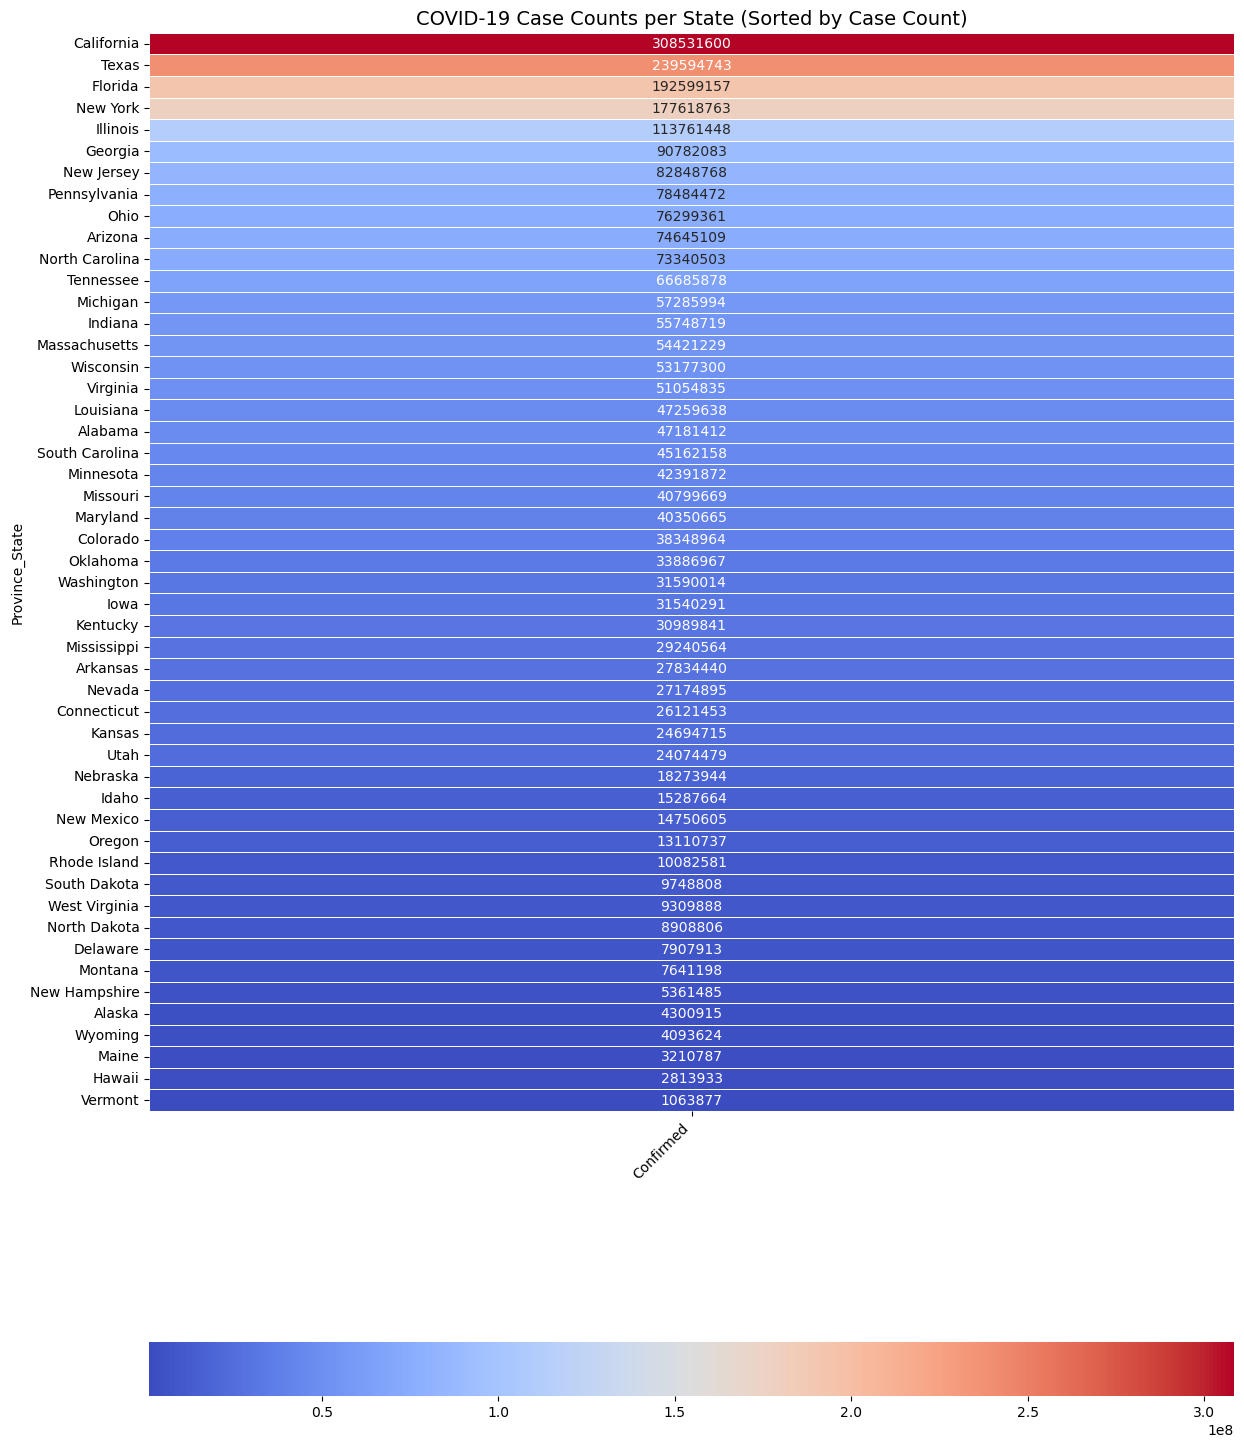

In [6]:
cases_by_state = df.groupby("Province_State", as_index=False)["Confirmed"].sum()
cases_by_state["Confirmed"] = pd.to_numeric(cases_by_state["Confirmed"], errors="coerce").fillna(1)
cases_by_state["Confirmed"] = cases_by_state["Confirmed"].replace(0, 1)
cases_by_state = cases_by_state.sort_values(by="Confirmed", ascending=False)

plt.figure(figsize=(14, 20))
ax = sns.heatmap(
    cases_by_state.set_index("Province_State"),
    cmap="coolwarm",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'orientation': 'horizontal'}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0, fontsize=10)
plt.title("COVID-19 Case Counts per State (Sorted by Case Count)", fontsize=14)
plt.show()


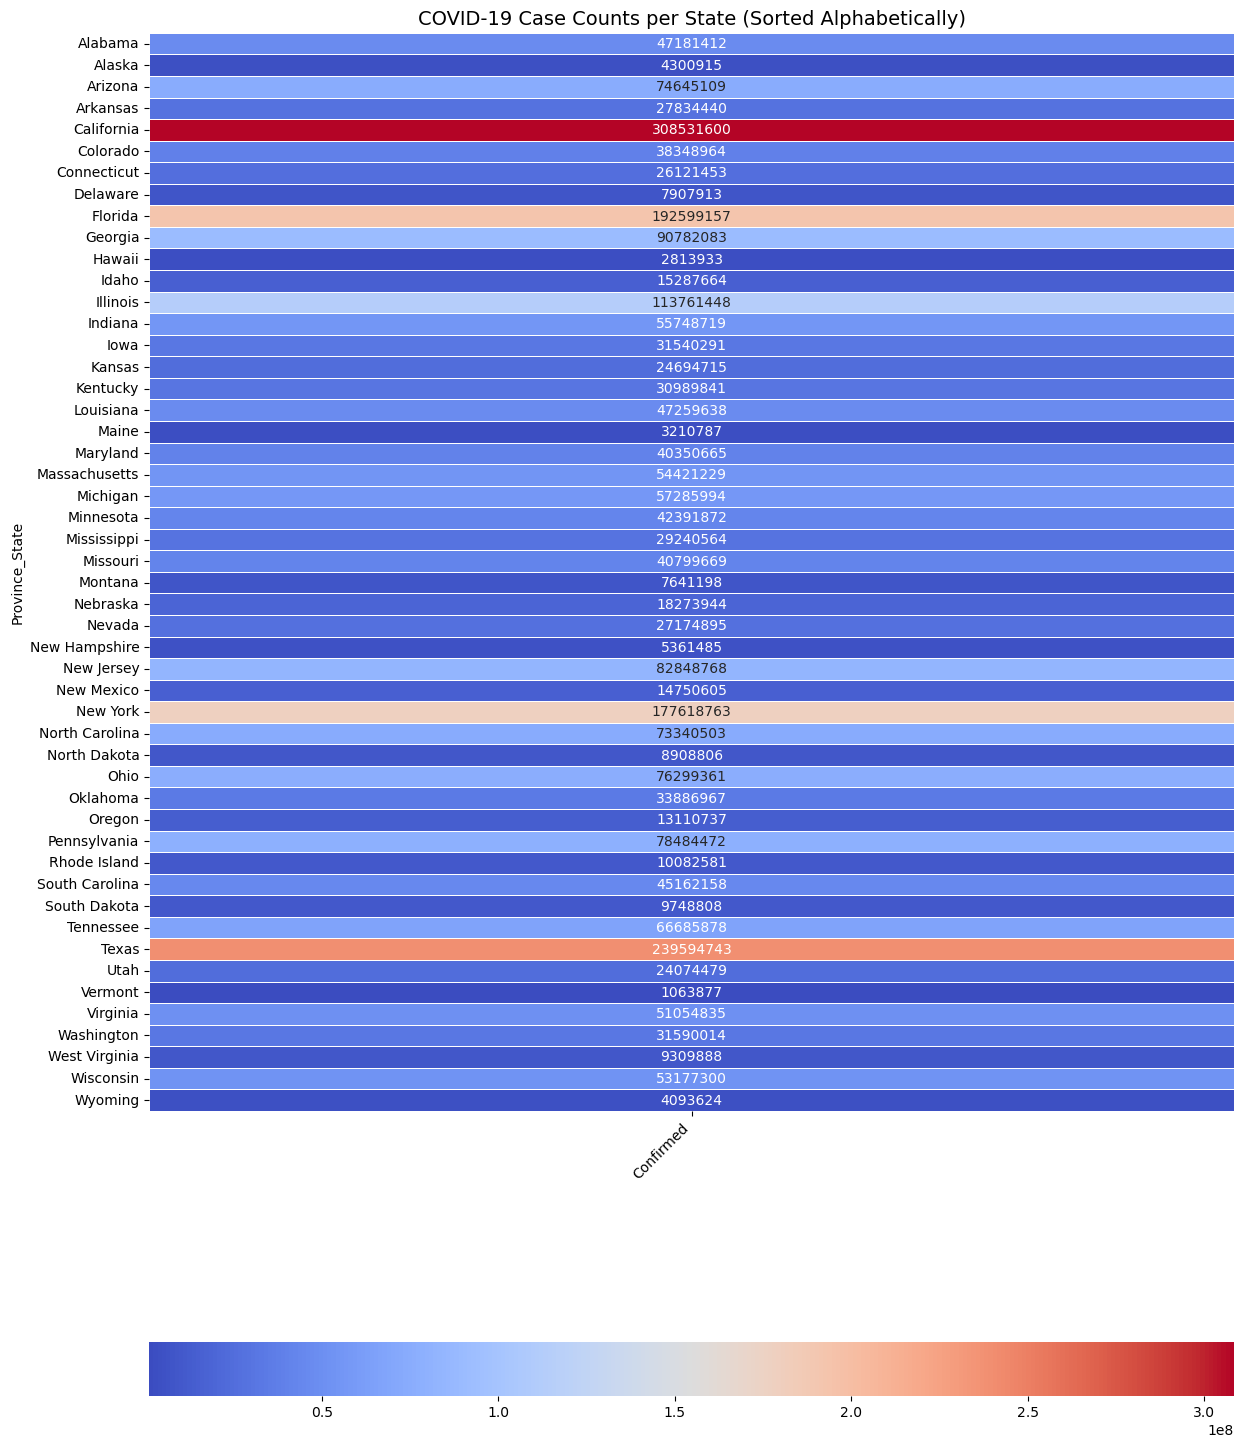

In [7]:
cases_by_state = df.groupby("Province_State", as_index=False)["Confirmed"].sum()
cases_by_state["Confirmed"] = pd.to_numeric(cases_by_state["Confirmed"], errors="coerce").fillna(1)
cases_by_state["Confirmed"] = cases_by_state["Confirmed"].replace(0, 1)
cases_by_state = cases_by_state.sort_values(by="Province_State")

plt.figure(figsize=(14, 20))
ax = sns.heatmap(
    cases_by_state.set_index("Province_State"),
    cmap="coolwarm",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'orientation': 'horizontal'}
)

plt.xticks(rotation=45, ha="right") 
plt.yticks(rotation=0, fontsize=10) 
plt.title("COVID-19 Case Counts per State (Sorted Alphabetically)", fontsize=14)
plt.show()


In [8]:
all_unique_states = df["Province_State"].unique()
num_unique_states = len(all_unique_states)

print(f"Total unique states in the dataset: {num_unique_states}")
print("List of the states:", all_unique_states)


Total unique states in the dataset: 50
List of the states: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


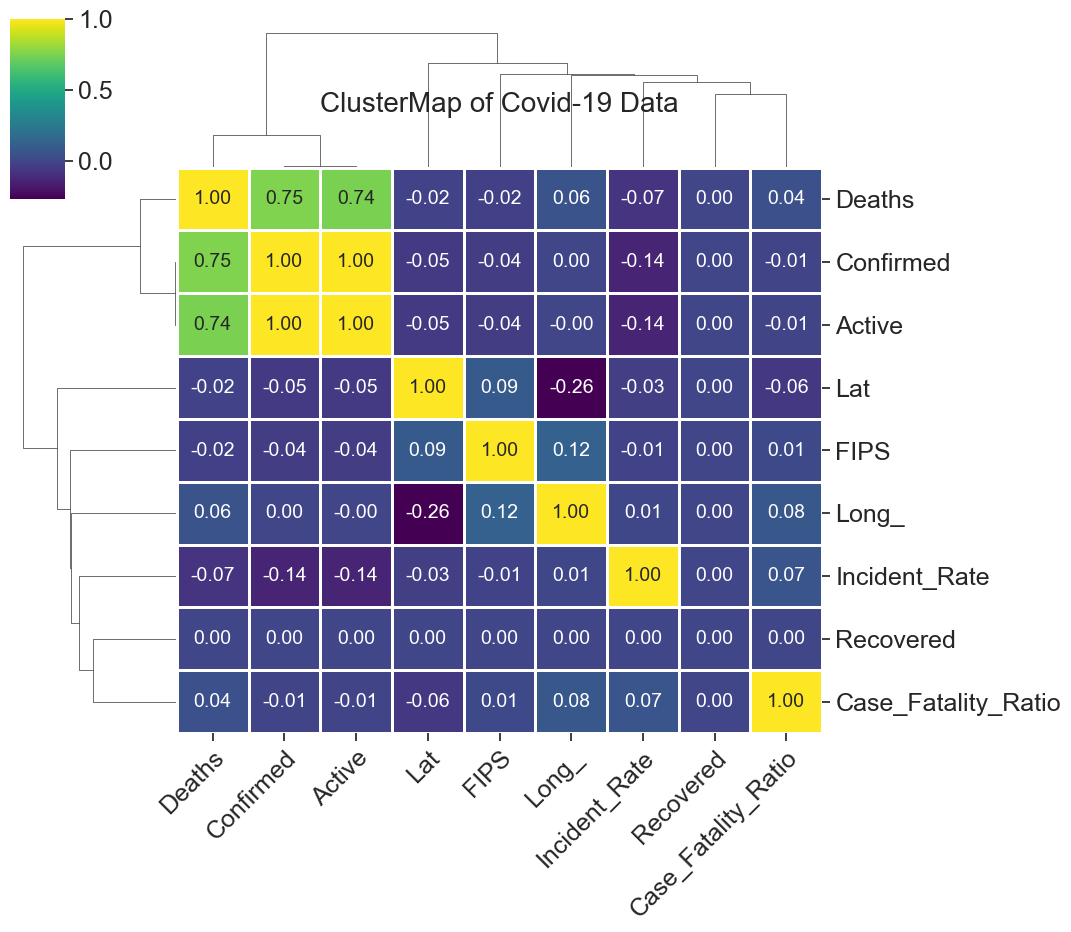

In [43]:
# all_numeric_columns = ['FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Case_Fatality_Ratio']
# df_numeric_based = df[all_numeric_columns]
# corr_matrix = df_numeric_based.corr()
# corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan)  
# corr_matrix = corr_matrix.fillna(0)  

# plt.figure(figsize=(10, 8))
# sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, figsize=(10, 8))
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's "ticks" style and update rcParams for improved fonts
sns.set_theme(style="ticks", font_scale=1.5)
plt.rcParams.update({
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'font.family': 'sans-serif'
})

# Select numeric columns and compute the correlation matrix
all_numeric_columns = ['FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Case_Fatality_Ratio']
df_numeric_based = df[all_numeric_columns]
corr_matrix = df_numeric_based.corr()
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan)  
corr_matrix = corr_matrix.fillna(0)  

# Generate the clustermap with improved aesthetics
# cmaps: YlOrRd, viridis, YlGnBu
cg = sns.clustermap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="viridis", 
    linewidths=0.75, 
    figsize=(11, 10),
    annot_kws={"size": 14}
)

# Add a title with extra padding
cg.ax_heatmap.set_title("ClusterMap of Covid-19 Data", pad=40, fontsize=20)

# Rotate tick labels for clarity
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(cg.ax_heatmap.get_yticklabels(), rotation=0)

plt.savefig("covid19_clustermap.png", dpi=300, bbox_inches="tight")
plt.show()


# Notes for the below visualization: 
    # 1. When there is a higher number of confirmed cases, there are more deaths (strong correlation)
    # 2. The same thing is applied to confirmed and active cases, as active cases are a subset of confirmed cases
    # 3. Locations with more active cases tend to have higher death counts

In [10]:
import networkx as nx
from matplotlib.colors import to_rgb

state_neighbors = {
    "Alabama": ["Florida", "Georgia", "Tennessee", "Mississippi"],
    "Alaska": [],
    "Arizona": ["California", "Nevada", "Utah", "Colorado", "New Mexico"],
    "Arkansas": ["Missouri", "Tennessee", "Mississippi", "Louisiana", "Texas", "Oklahoma"],
    "California": ["Oregon", "Nevada", "Arizona"],
    "Colorado": ["Wyoming", "Nebraska", "Kansas", "Oklahoma", "New Mexico", "Arizona", "Utah"],
    "Connecticut": ["New York", "Massachusetts", "Rhode Island"],
    "Delaware": ["Maryland", "Pennsylvania", "New Jersey"],
    "Florida": ["Alabama", "Georgia"],
    "Georgia": ["Florida", "Alabama", "Tennessee", "North Carolina", "South Carolina"],
    "Hawaii": [],
    "Idaho": ["Washington", "Oregon", "Nevada", "Utah", "Wyoming", "Montana"],
    "Illinois": ["Wisconsin", "Iowa", "Missouri", "Kentucky", "Indiana", "Michigan"],
    "Indiana": ["Michigan", "Ohio", "Kentucky", "Illinois"],
    "Iowa": ["Minnesota", "South Dakota", "Nebraska", "Missouri", "Illinois", "Wisconsin"],
    "Kansas": ["Nebraska", "Missouri", "Oklahoma", "Colorado"],
    "Kentucky": ["Indiana", "Ohio", "West Virginia", "Virginia", "Tennessee", "Missouri", "Illinois"],
    "Louisiana": ["Texas", "Arkansas", "Mississippi"],
    "Maine": ["New Hampshire"],
    "Maryland": ["Virginia", "West Virginia", "Pennsylvania", "Delaware"],
    "Massachusetts": ["Rhode Island", "Connecticut", "New York", "Vermont", "New Hampshire"],
    "Michigan": ["Ohio", "Indiana", "Wisconsin"],
    "Minnesota": ["North Dakota", "South Dakota", "Iowa", "Wisconsin"],
    "Mississippi": ["Louisiana", "Arkansas", "Tennessee", "Alabama"],
    "Missouri": ["Iowa", "Illinois", "Kentucky", "Tennessee", "Arkansas", "Oklahoma", "Kansas", "Nebraska"],
    "Montana": ["North Dakota", "South Dakota", "Wyoming", "Idaho"],
    "Nebraska": ["South Dakota", "Iowa", "Missouri", "Kansas", "Colorado", "Wyoming"],
    "Nevada": ["Idaho", "Oregon", "California", "Arizona", "Utah"],
    "New Hampshire": ["Vermont", "Maine", "Massachusetts"],
    "New Jersey": ["New York", "Pennsylvania", "Delaware"],
    "New Mexico": ["Arizona", "Utah", "Colorado", "Oklahoma", "Texas"],
    "New York": ["Pennsylvania", "New Jersey", "Connecticut", "Massachusetts", "Vermont"],
    "North Carolina": ["Virginia", "Tennessee", "Georgia", "South Carolina"],
    "North Dakota": ["Montana", "South Dakota", "Minnesota"],
    "Ohio": ["Pennsylvania", "West Virginia", "Kentucky", "Indiana", "Michigan"],
    "Oklahoma": ["Kansas", "Missouri", "Arkansas", "Texas", "New Mexico", "Colorado"],
    "Oregon": ["Washington", "Idaho", "Nevada", "California"],
    "Pennsylvania": ["New York", "New Jersey", "Delaware", "Maryland", "West Virginia", "Ohio"],
    "Rhode Island": ["Connecticut", "Massachusetts"],
    "South Carolina": ["North Carolina", "Georgia"],
    "South Dakota": ["North Dakota", "Minnesota", "Iowa", "Nebraska", "Wyoming", "Montana"],
    "Tennessee": ["Kentucky", "Virginia", "North Carolina", "Georgia", "Alabama", "Mississippi", "Arkansas", "Missouri"],
    "Texas": ["New Mexico", "Oklahoma", "Arkansas", "Louisiana"],
    "Utah": ["Idaho", "Wyoming", "Colorado", "New Mexico", "Arizona", "Nevada"],
    "Vermont": ["New York", "Massachusetts", "New Hampshire"],
    "Virginia": ["Maryland", "North Carolina", "Tennessee", "Kentucky", "West Virginia"],
    "Washington": ["Idaho", "Oregon"],
    "West Virginia": ["Ohio", "Pennsylvania", "Maryland", "Virginia", "Kentucky"],
    "Wisconsin": ["Minnesota", "Iowa", "Illinois", "Michigan"],
    "Wyoming": ["Montana", "South Dakota", "Nebraska", "Colorado", "Utah", "Idaho"]
}

state_positions = df.groupby("Province_State")[["Lat", "Long_"]].mean().to_dict("index")

def case_color_map(G):
    color_map = []
    max_cases = max(nx.get_node_attributes(G, "cases").values())
    for node in G:
        cases = G.nodes[node]["cases"]
        intensity = cases / max_cases
        color = np.array(to_rgb("blue")) * (1 - intensity) + intensity * np.array(to_rgb("red"))
        color_map.append(color)
    return color_map

def case_size_map(G):
    size_map = []
    for node in G:
        size_map.append(G.nodes[node]["cases"] / 100000)
    return size_map

G = nx.Graph()

statewise_cases = df.groupby("Province_State")["Confirmed"].sum()
state_names = statewise_cases.index.tolist()

for state in state_names:
    cases = statewise_cases[state]
    if state in state_positions:
        G.add_node(state, cases=cases, pos=(state_positions[state]["Long_"], state_positions[state]["Lat"]))

for state, neighbors in state_neighbors.items():
    for neighbor in neighbors:
        if state in G.nodes and neighbor in G.nodes:
            G.add_edge(state, neighbor)

colors = case_color_map(G)
sizes = case_size_map(G)
pos = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=colors,
    edge_color="gray",
    node_size=sizes,
    cmap=plt.cm.Reds,
    font_size=8,
    alpha=0.9,
    width=0.5
)

plt.title("COVID-19 Spread Network (Geographic Layout)")
plt.show()


ModuleNotFoundError: No module named 'networkx'

In [ ]:
import matplotlib.dates as mdates

cases_per_day = df.groupby("Date")["Confirmed"].sum()
cases_per_day.index = pd.to_datetime(cases_per_day.index)

plt.figure(figsize=(12, 6))
plt.plot(cases_per_day.index, cases_per_day.values, marker="o", linestyle="-", color="red", markersize=4)
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.title("COVID-19 Cases Over Time")
plt.xticks(rotation=45) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
statewise_trends = df.groupby(["Date", "Province_State"])["Confirmed"].sum().unstack()

plt.figure(figsize=(14, 8))

for state in statewise_trends.columns:
    plt.plot(statewise_trends.index, statewise_trends[state], linestyle="-", linewidth=1, alpha=0.6, label=state)

plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Cases Over Time for Each State")
plt.xticks(rotation=45)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize="small", ncol=2)  # Legend outside the plot
plt.grid()
plt.show()


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap

df = pd.read_csv("Kiana_cleaned_covid19_daily_reports_US.csv") 

if 'latitude' not in df.columns and 'longitude' not in df.columns:
    df.rename(columns={'Lat': 'latitude', 'Long_': 'longitude'}, inplace=True)

df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
lons = gdf['longitude'].values
lats = gdf['latitude'].values
cases = gdf['Confirmed'].values  
cases_scaled = (cases - cases.min()) / (cases.max() - cases.min())
fig, ax = plt.subplots(figsize=(12, 6))

m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-95,
            llcrnrlon=-125, llcrnrlat=24, 
            urcrnrlon=-66, urcrnrlat=50, 
            ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
x, y = m(lons, lats)

sc = ax.scatter(x, y, c=cases_scaled, cmap='Reds', alpha=0.75, s=cases_scaled * 500 + 30)
cbar = plt.colorbar(sc, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Normalized COVID Cases")
plt.title('COVID-19 Cases Heatmap (Geospatial)')
plt.show()
